In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get Data

In [2]:
dataset = [[0, 0, 0], [255, 255, 255], [255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [0, 255, 255], [255, 0, 255],
                [192, 192, 192], [128, 128, 128], [128, 0, 0], [128, 128, 0], [0, 128, 0], [128, 0, 128], [0, 128, 128], [0, 0, 128], [139, 0, 0],
                [255, 140, 0], [238, 232, 170], [154, 205, 50], [0, 100, 0], [70, 130, 180], [25, 25, 112], [245, 245, 220]]

# normalize colors value between (0,1)
dataset = np.array(dataset) / 255

## Build Model

In [3]:
class SOM:
    def __init__(self, sigma_0, alpha_0, epochs):
        
        # map size = 100*100, data feature = 3  
        self.w = np.random.rand(100*100,3)
        self.w_map = self.generate_w_map()
        self.sigma_0 = sigma_0
        self.alpha_0 = alpha_0
        self.epochs = epochs
    
    # map is (10000, 2), each element stores the index of a node
    # eg. result[99] = [0,99]
    def generate_w_map(self):
        a1 = np.zeros(10000).reshape(-1,1)
        a2 = np.arange(100)
        for i in range(100):
            a1[100*i:100*i+100] = i

        a2 = np.concatenate((a2, np.tile(a2,99))).reshape(-1,1)
        result = np.concatenate((a1,a2),axis=1)
        return result
    
    def train(self, dataset):
        for i in range(self.epochs):
            epoch_num = i
            if epoch_num == 0:
                self.draw(epoch_num)
            ## each epoch will process all data points once
            for each_data in dataset:
                self.process(each_data, epoch_num)
            if epoch_num in [19, 39, 99, 999]:
                self.draw(epoch_num)
    
    def draw(self, epoch_num):
        if(epoch_num == 0):
            plt.title('initial graph, sigma = {}'.format(self.sigma_0))
            plt.imshow(self.w.reshape(100,100,3))
            plt.show()
        else:
            plt.title('epoch = {}, sigma = {}'.format(epoch_num+1, self.sigma_0))
            plt.imshow(self.w.reshape(100,100,3))
            plt.show()
        
    def win_node_index(self, data):
        distance = np.linalg.norm((self.w-data),axis=1)
        node_num = np.argmin(distance)
        return np.array([node_num//100, node_num%100])
        
    def process(self, data, epoch_num):
        win_index = self.win_node_index(data)
        d_ij = np.linalg.norm((self.w_map-win_index),axis=1).reshape(-1,1)
        alpha = self.alpha_0*np.exp(-epoch_num/self.epochs)
        sigma = self.sigma_0*np.exp(-epoch_num/self.epochs)
        h = np.exp(-((d_ij**2)/(2*(sigma**2))))

        self.w += h * alpha * (data-self.w)

        
        
    

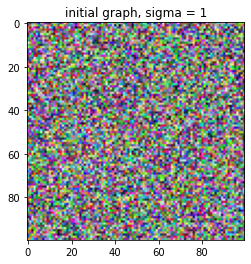

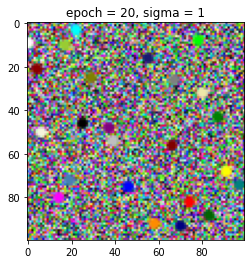

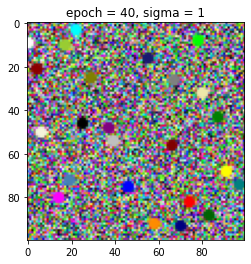

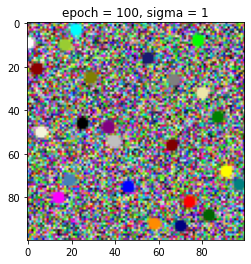

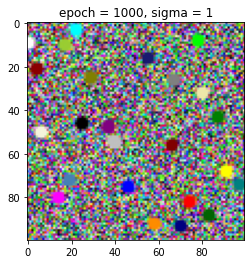

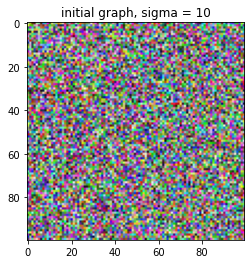

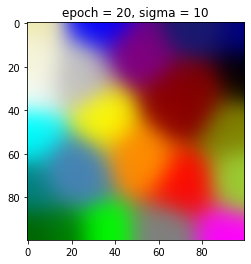

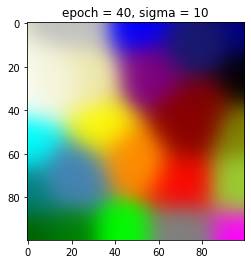

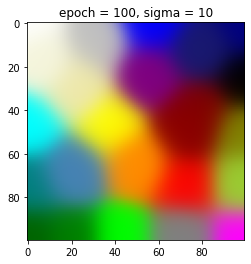

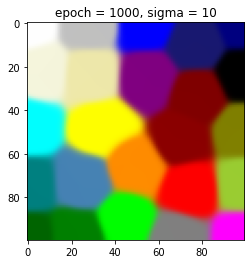

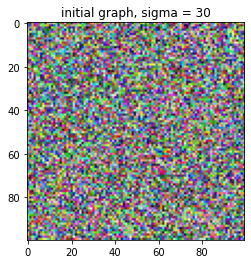

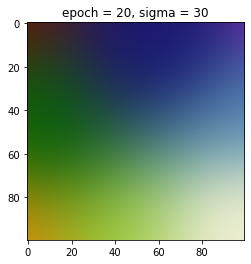

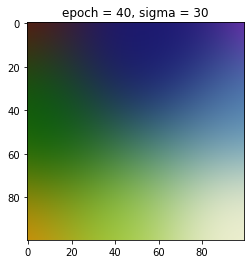

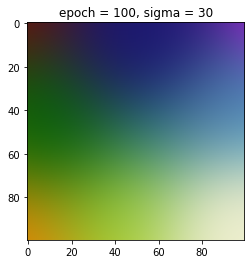

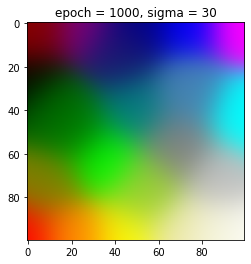

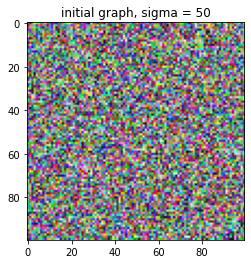

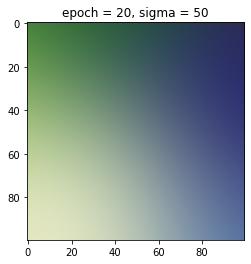

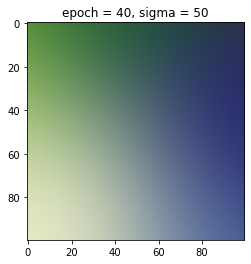

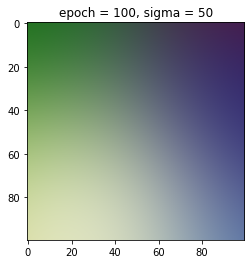

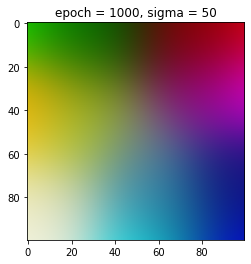

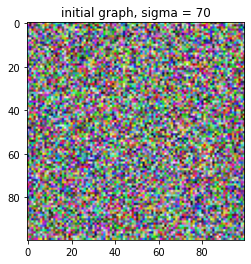

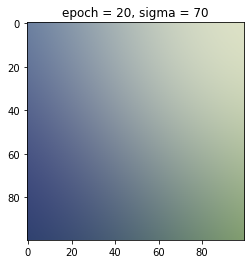

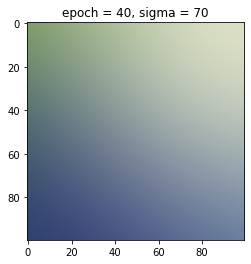

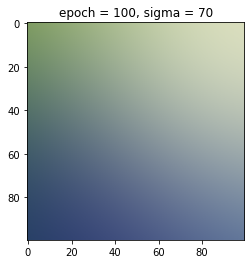

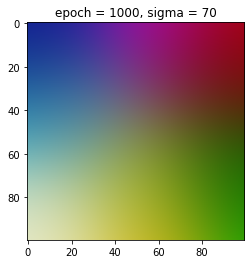

In [4]:
for sigma in [1,10,30,50,70]:
    nn = SOM(sigma_0=sigma, alpha_0=0.8, epochs=1000)
    nn.train(dataset)